<a href="https://colab.research.google.com/github/ZaplatinArtur/spotify_final/blob/main/laba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np

spotify = pd.read_csv("dataset.csv")
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Описание колонок**

<h1>Расшифровка колонок:</h1>

<b>track_id</b>: идентификатор Spotify для трека

<b>artists</b>: Имена исполнителей, которые выполнили трек. Если исполнителей больше одного, они разделены точкой с запятой

<b>album_name</b>: Название альбома, в котором появляется трек

<b>track_name</b>: Название трека

<b>popularity</b>: Популярность трека — это значение между 0 и 100, где 100 — самая популярная. Популярность рассчитывается алгоритмом и в основном зависит от общего количества прослушиваний трека и того, насколько эти прослушивания недавние. В общем, песни, которые сейчас слушают много, будут иметь более высокую популярность, чем песни, которые слушали много в прошлом. Дублирующиеся треки (например, один и тот же трек из сингла и альбома) оцениваются независимо. Популярность артиста и альбома выводится математически из популярности трека

<b>duration_ms</b>: Длительность трека в миллисекундах

<b>explicit</b>: Содержит ли трек откровенную лирику (true = да; false = нет или неизвестно)

<b>danceability</b>: Танцевальность описывает, насколько трек подходит для танцев на основе комбинации музыкальных элементов, включая темп, стабильность ритма, силу бита и общую регулярность. Значение 0.0 — наименее танцевальный, 1.0 — наиболее танцевальный

<b>energy</b>: Энергия — это мера от 0.0 до 1.0 и представляет собой воспринимаемую меру интенсивности и активности. Обычно энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал имеет высокую энергию, тогда как прелюдия Баха получает низкий балл по шкале

<b>key</b>: Ключ, в котором находится трек. Целые числа соответствуют высотам звука с использованием стандартной нотации класса высоты. Например, 0 = C, 1 = C♯/D♭, 2 = D и так далее. Если ключ не был обнаружен, значение равно -1

<b>loudness</b>: Общая громкость трека в децибелах (дБ)

<b>mode</b>: Режим указывает модальность (мажор или минор) трека, тип масштаба, из которого происходит его мелодическое содержание. Мажор представлен 1, минор — 0

<b>speechiness</b>: Речевитость обнаруживает наличие разговорных слов в треке. Чем больше трек похож на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1.0 значение атрибута. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из разговорных слов. Значения между 0.33 и 0.66 описывают треки, которые могут содержать как музыку, так и речь, либо в разделах, либо в слоях, включая такие случаи, как рэп-музыка. Значения ниже 0.33, скорее всего, представляют музыку и другие неречевые треки

<b>acousticness</b>: Мера уверенности от 0.0 до 1.0 в том, является ли трек акустическим. 1.0 представляет высокую уверенность в том, что трек акустический

<b>instrumentalness</b>: Предсказывает, содержит ли трек вокал. Звуки "оох" и "аах" рассматриваются как инструментальные в этом контексте. Рэп или спич-треки явно "вокальные". Чем ближе значение инструментальности к 1.0, тем выше вероятность, что трек не содержит вокала

<b>liveness</b>: Обнаруживает наличие аудитории в записи. Более высокие значения живучести представляют увеличенную вероятность того, что трек был исполнен вживую. Значение выше 0.8 обеспечивает высокую вероятность того, что трек живой

<b>valence</b>: Мера от 0.0 до 1.0, описывающая музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливо, радостно, эйфорично), тогда как треки с низкой валентностью звучат более негативно (например, грустно, подавленно, зло)

<b>tempo</b>: Общая оценка темпа трека в ударах в минуту (BPM). В музыкальной терминологии темп — это скорость или темп данного произведения и происходит непосредственно от средней длительности удара

<b>time_signature</b>: Оценка размера. Размер (метр) — это нотационное соглашение для указания количества ударов в каждом такте (или мере). Размер варьируется от 3 до 7, указывая размеры от 3/4 до 7/4

<b>track_genre</b>: Жанр, к которому принадлежит трек


# *АНАЛИТИКА*

In [3]:
spotify.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
spotify = spotify.drop("Unnamed: 0",axis = 1)

удалили эту колонку т.к она ни несет в себе смысла

также можем удалить название песни

In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

**Работа с пропусками**

In [6]:
np.sum(spotify.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


как видиим пропусков мало,можем их просто удалить

In [7]:
spotify = spotify.dropna()
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

**ГРАФИКИ**

Рассмотрим корреляцию между призниками и таргетной переменной

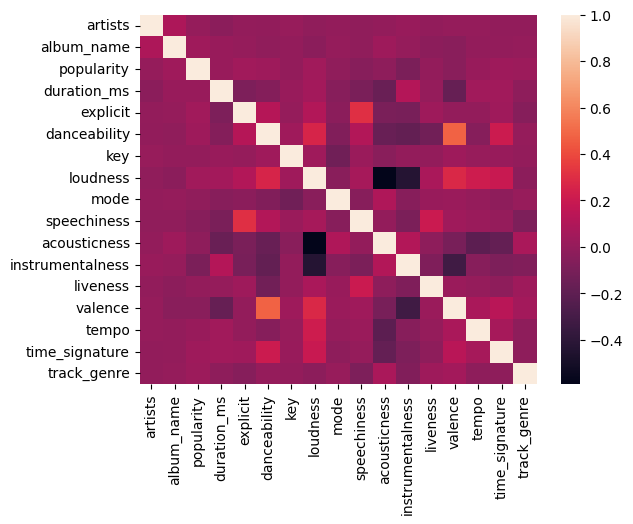

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(spotify.corr(numeric_only = True));

Как видим признаки между собой сильно не коррелируют,что хорошо.Но также видно ,что не один признак сильно не коррелирует с целевой переменной,что плохо

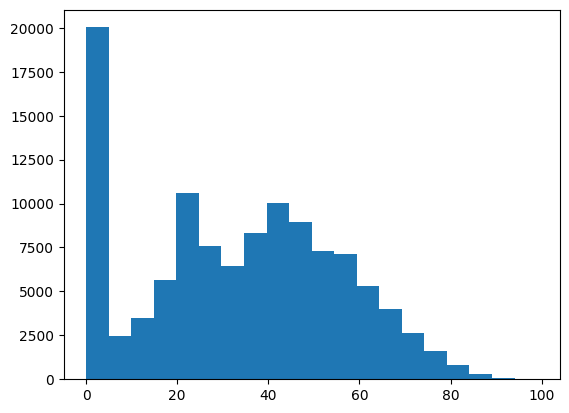

In [ ]:
plt.hist(spotify['popularity'],bins = 20);

Рассмотрим как нецензурная речь влияет на популярность

<BarContainer object of 2 artists>

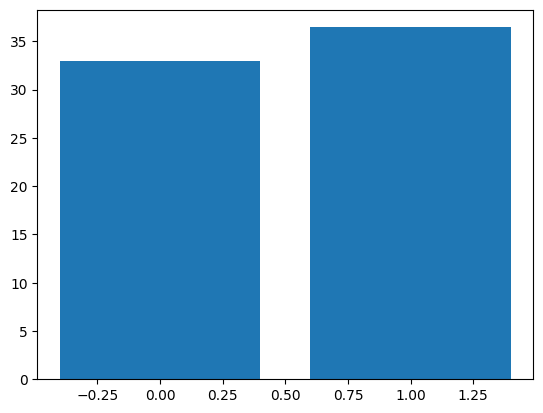

In [ ]:
plt.bar(spotify["explicit"].unique(),spotify.groupby("explicit")["popularity"].mean())

отличия есть не не такие большие

рассмотрим взаимосвязь продолжительности песни и её популярности

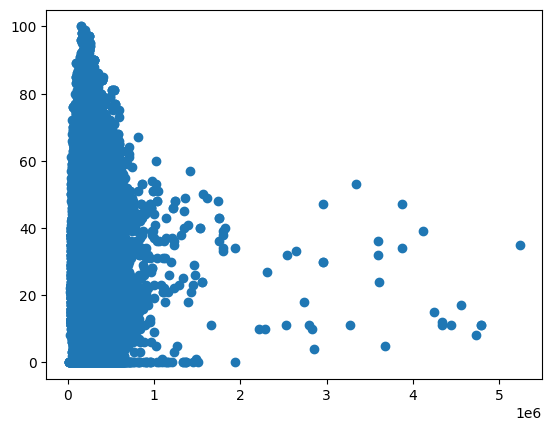

In [ ]:
plt.scatter(spotify["duration_ms"],spotify["popularity"]);

как види в основном популярны песни до 2 минут,также видим наличие выбросов

Рассмотрим количесво популярных артистов

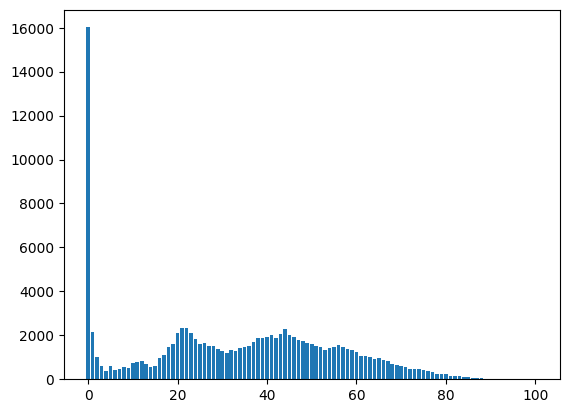

In [ ]:

plt.bar(sorted(list(spotify["popularity"].unique())),spotify.groupby("popularity",as_index = False).count()["artists"]);

Как видим,большая часть артистов непопулярна

Посмотрим влияет ли жанр на популярность

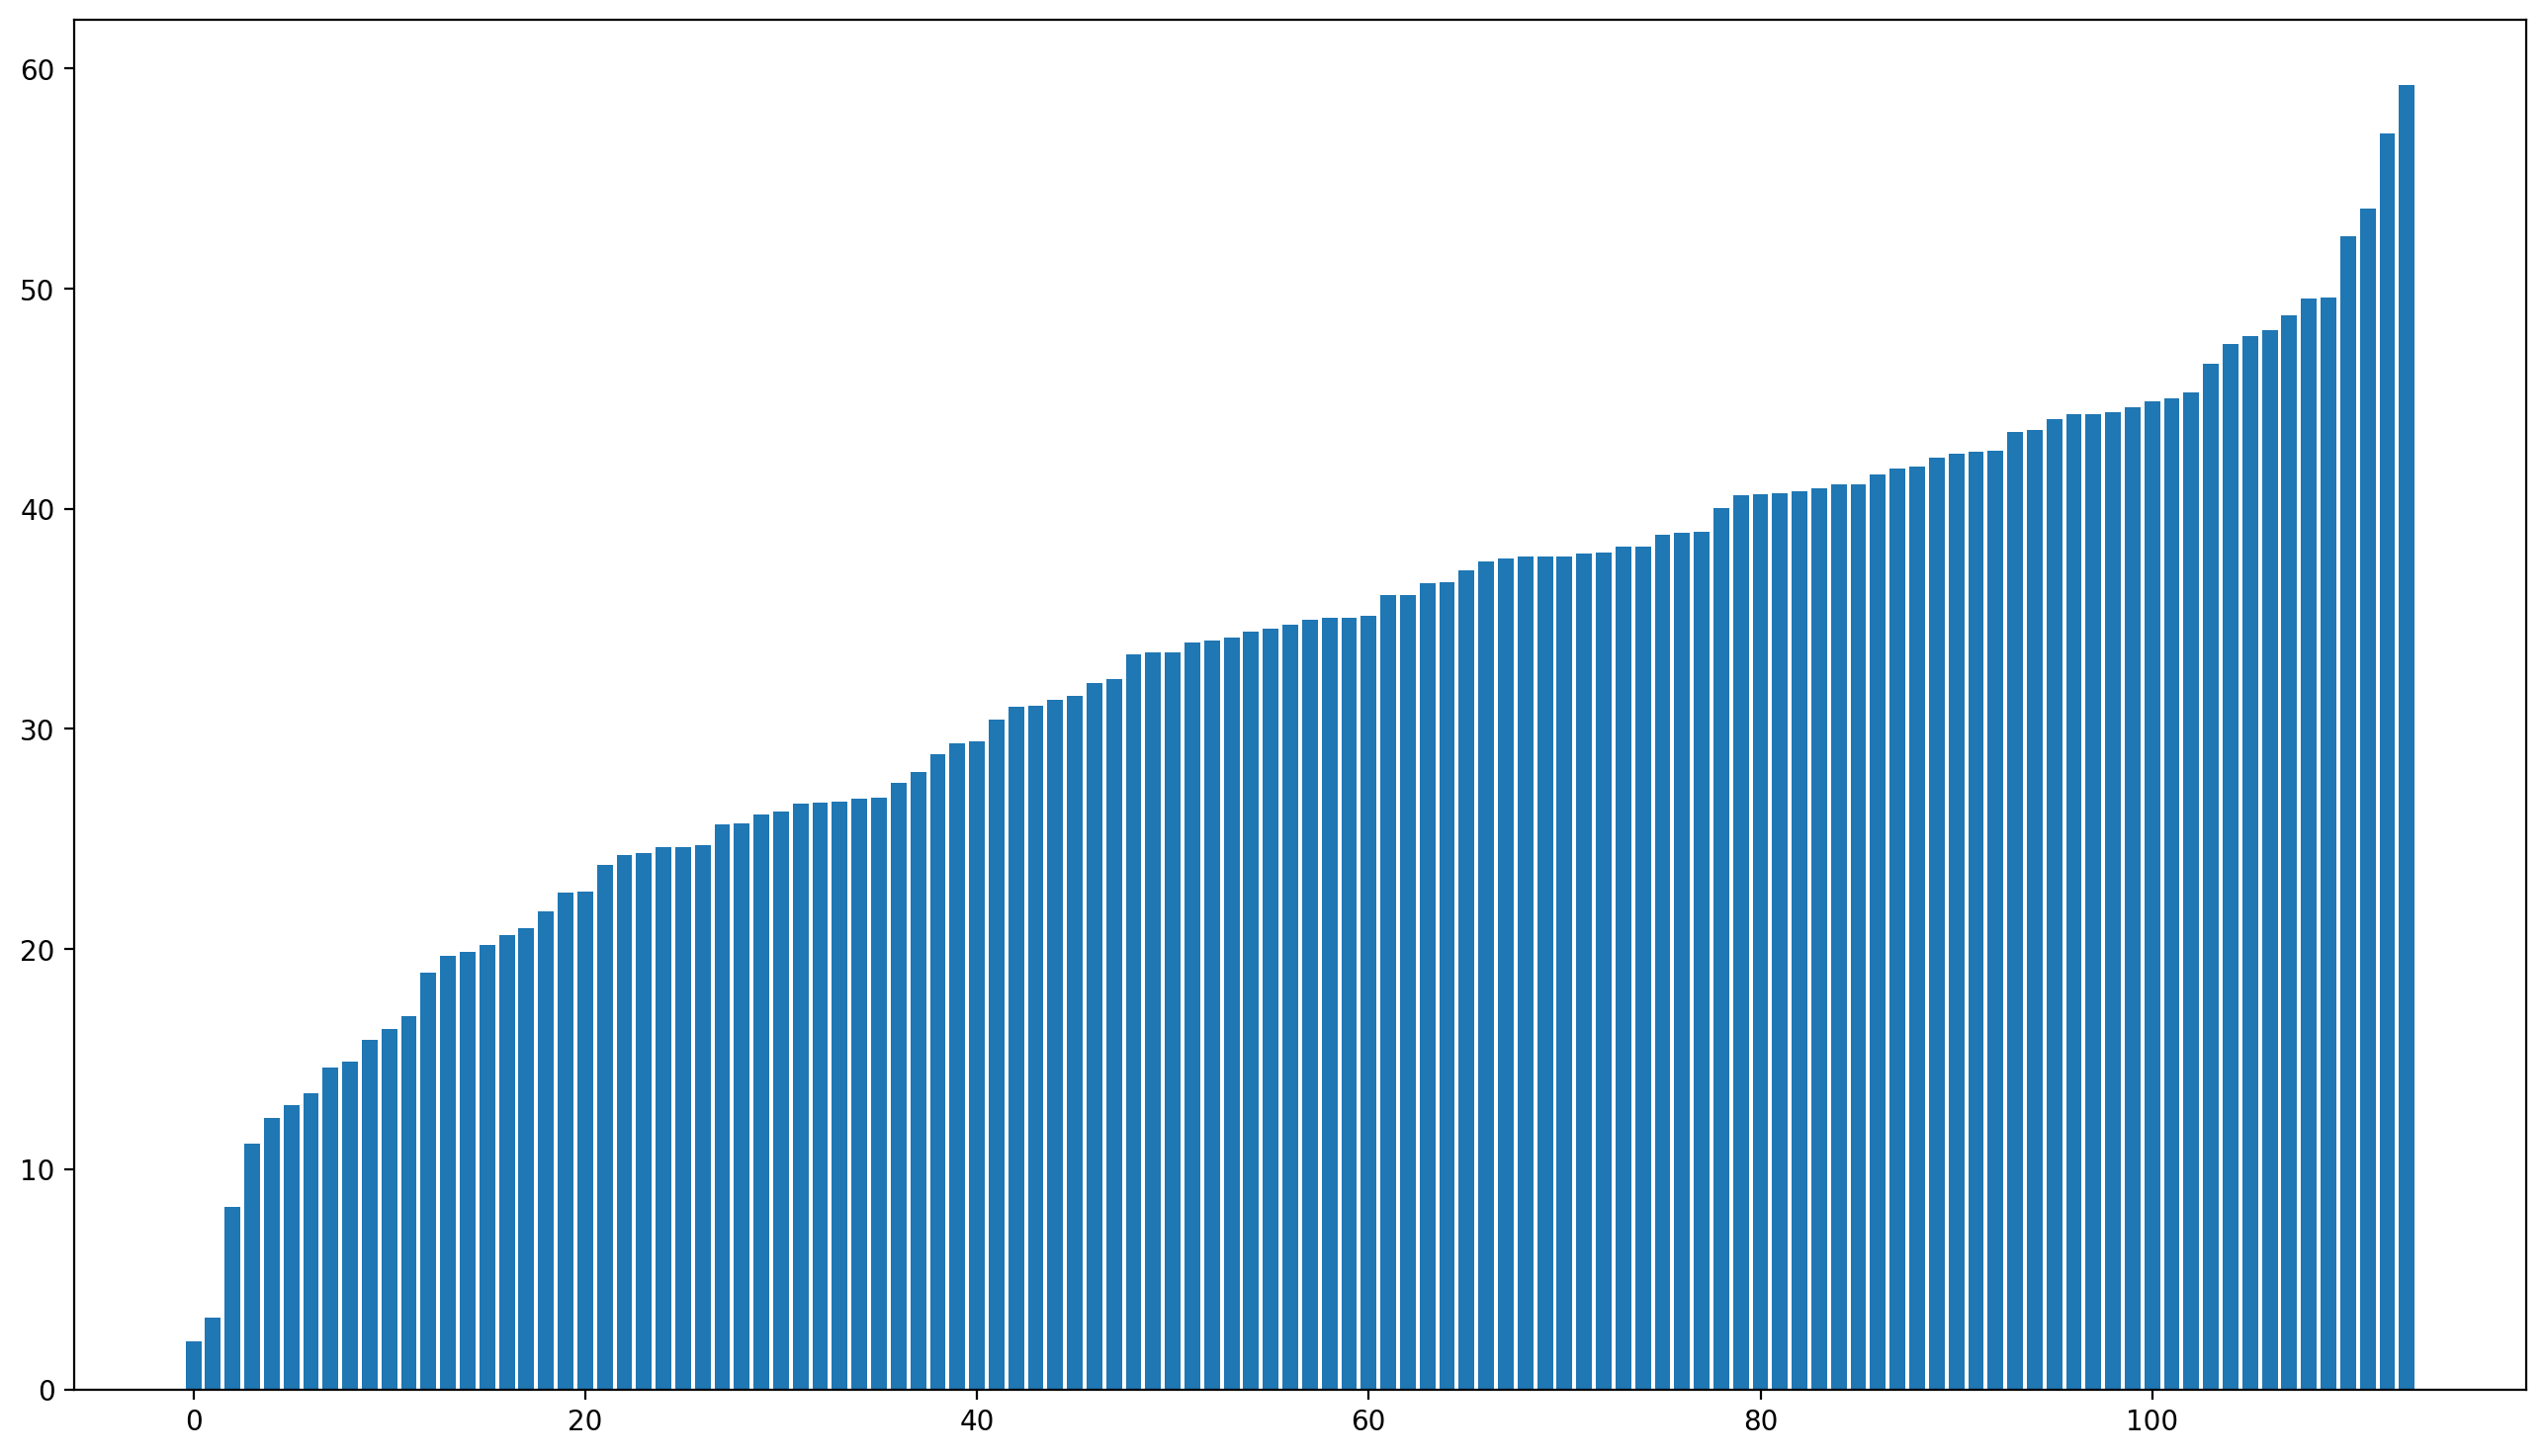

In [ ]:
fig= plt.figure(figsize = (16,9),dpi = 200)

plt.bar(sorted(list(spotify["track_genre"].unique())),sorted(list(spotify.groupby("track_genre",as_index = False).mean()["popularity"])));

Да влияет,есть как популярные,так и непопулярные жанры

**РАБОТА С ВЫБРОСАМИ**

Рассмотрим выбросы по продолжительности

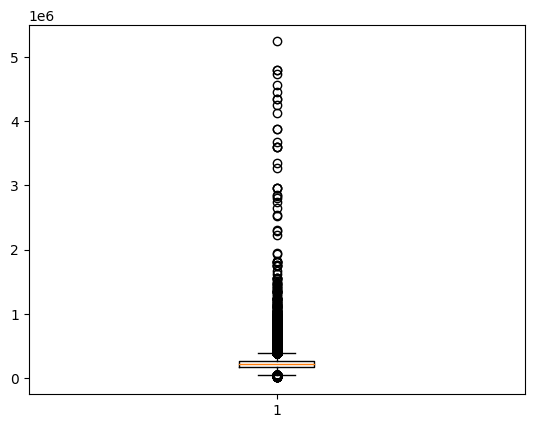

In [ ]:
plt.boxplot(spotify["duration_ms"]);

на прошлых графиках мы видили,что больша часть объектов находится в диапозоне до 2х минут,поэтому график так выглядит

Но с выбросами все равно надо бороться,поэтому удалим 1% объектов ,которые наиболее сильно выбиваются по длительности

In [ ]:
q = spotify["duration_ms"].quantile(0.99)
q

530909.3200000006

In [ ]:
spotify = spotify[spotify["duration_ms"]<=q]

In [ ]:
spotify

,track_id,artists,album_name,popularity,duration_ms,explicit,danceability,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_loudness
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,False,0.676,1,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,-3.109906
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),55,149610,False,0.420,1,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,-2.861010
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,-3.494506
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,-1.103494
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,82,198853,False,0.618,2,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,-4.288683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,21,384999,False,0.172,5,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,-3.852355
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,22,385000,False,0.174,0,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,-2.143206
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,22,271466,False,0.629,0,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,-3.584455
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,41,283893,False,0.587,7,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,-5.509834


Рассмотрим выбросы по популярности

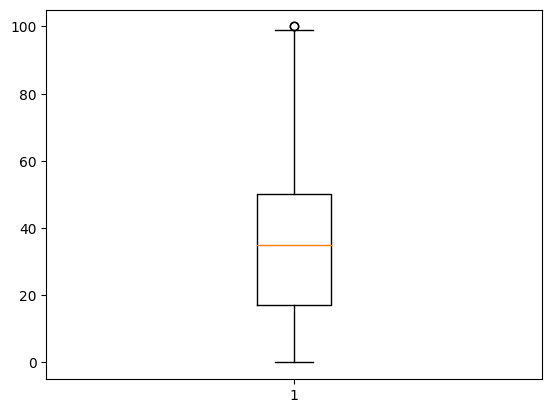

In [ ]:
plt.boxplot(spotify["popularity"]);

Как видим выбросов почти нет,только если популярности равна 100,удалим эти значения

In [ ]:
spotify = spotify[spotify["popularity"]<100]

In [ ]:
spotify.describe()

,popularity,duration_ms,danceability,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,energy_loudness
count,113997.000000,1.139970e+05,113997.000000,113997.000000,113997.000000,113997.000000,113997.000000,113997.000000,113997.000000,113997.000000,113997.000000,113997.000000,113997.000000
mean,33.237655,2.280324e+05,0.566798,5.309184,0.637552,0.084652,0.314912,0.156054,0.213553,0.474070,122.147537,3.904033,-4.333611
std,22.303402,1.072966e+05,0.173543,3.560003,0.480709,0.105734,0.332523,0.309558,0.190380,0.259261,29.978529,0.432626,1.884886
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.694192
25%,17.000000,1.740660e+05,0.456000,2.000000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218000,4.000000,-5.195877
50%,35.000000,2.129060e+05,0.580000,5.000000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,-4.107604
75%,50.000000,2.615060e+05,0.695000,8.000000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,-3.221955
max,99.000000,5.237295e+06,0.985000,11.000000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,4.527468


# Создание признаков

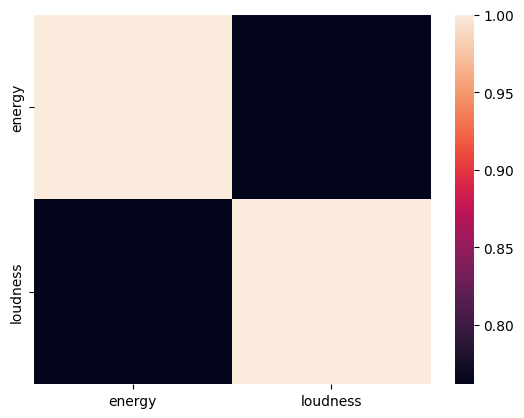

In [ ]:
import seaborn as sns

sns.heatmap(spotify[["energy","loudness"]].corr(numeric_only = True));



In [ ]:
#spotify["energy_loudness"] = spotify["loudness"]*spotify["energy"]
#spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_loudness
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,-3.109906
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,-2.861010
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,-3.494506
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,-1.103494
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,-4.288683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,-3.852355
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,-2.143206
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,-3.584455
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,-5.509834


In [ ]:
spotify = spotify.drop(["energy"],axis = 1)

In [ ]:
spotify = spotify.drop("track_name",axis = 1)

# *ОБУЧЕНИЕ МОДЕЛЕЙ*


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorial_col = spotify.select_dtypes(include=['object']).columns
for col in categorial_col:
    le = LabelEncoder()
    spotify[col] = le.fit_transform(spotify[col])
spotify

,track_id,artists,album_name,popularity,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,62110,10283,8025,73,230666,False,0.676,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55021,3267,14660,55,149610,False,0.420,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,19515,12303,38804,57,210826,False,0.438,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,77024,14732,8499,71,201933,False,0.266,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,67435,5215,16750,82,198853,False,0.618,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,24890,22324,65,21,384999,False,0.172,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,19333,22324,65,22,385000,False,0.174,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,79184,4914,4979,22,271466,False,0.629,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,30083,18403,7168,41,283893,False,0.587,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


In [ ]:
spotify = spotify.drop("track_id",axis =1)

**ЛИНЕЙНЫЕ МОДЕЛИ**

In [ ]:

from sklearn.model_selection import train_test_split


X = spotify.drop("popularity",axis =1)
Y = spotify["popularity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_squared_error,mean_absolute_error

scaler = StandardScaler()
model = LinearRegression()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)
model.fit(X_train,y_train)


print(f"MSE: {mean_squared_error(model.predict(X_test),y_test)}")
print(f"RMSE: {mean_squared_error(model.predict(X_test),y_test)**0.5}")
print(f"MAE: {mean_absolute_error(model.predict(X_test),y_test)}")

MSE: 481.1998358121927
RMSE: 21.936267590731855
MAE: 18.29683446509553


попробовал добавить полиномиальные признаки 2 степени

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
#spotify["oth"]  = spotify["popularity"]/spotify["duration_ms"]

X = spotify.drop("popularity",axis =1)
X  =poly.fit_transform(X)
Y = spotify["popularity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

scaler = StandardScaler()
model = LinearRegression()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)
model.fit(X_train,y_train)


print(f"MSE: {mean_squared_error(model.predict(X_test),y_test)}")
print(f"RMSE: {mean_squared_error(model.predict(X_test),y_test)**0.5}")
print(f"MAE: {mean_absolute_error(model.predict(X_test),y_test)}")

MSE: 459.55246344793017
RMSE: 21.43717480098369
MAE: 17.612421753335802


Есть незначительный прирост

попробовал 3 степень

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
#spotify["oth"]  = spotify["popularity"]/spotify["duration_ms"]

X = spotify.drop("popularity",axis =1)
X  =poly.fit_transform(X)
Y = spotify["popularity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

scaler = StandardScaler()
model = LinearRegression()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)
model.fit(X_train,y_train)


print(f"MSE: {mean_squared_error(model.predict(X_test),y_test)}")
print(f"RMSE: {mean_squared_error(model.predict(X_test),y_test)**0.5}")
print(f"MAE: {mean_absolute_error(model.predict(X_test),y_test)}")

MSE: 441.2204880386166
RMSE: 21.00524905919034
MAE: 17.100576628587074


также незначительный прирост

**Ridge**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

scaler = StandardScaler()
model = Ridge(alpha = 0.01)
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)
model.fit(X_train,y_train)


print(f"MSE: {mean_squared_error(model.predict(X_test),y_test)}")
print(f"RMSE: {mean_squared_error(model.predict(X_test),y_test)**0.5}")
print(f"MAE: {mean_absolute_error(model.predict(X_test),y_test)}")

MSE: 441.2050104120735
RMSE: 21.004880633130803
MAE: 17.10012827298112


**RandomForestRegressor**

In [ ]:
from sklearn.model_selection import train_test_split


X = spotify.drop("popularity",axis =1)
Y = spotify["popularity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

scaler = StandardScaler()
model = RandomForestRegressor()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)
model.fit(X_train,y_train)


print(f"MSE: {mean_squared_error(model.predict(X_test),y_test)}")
print(f"RMSE: {mean_squared_error(model.predict(X_test),y_test)**0.5}")
print(f"MAE: {mean_absolute_error(model.predict(X_test),y_test)}")

MSE: 263.3375553772882
RMSE: 16.227678681108035
MAE: 12.49272265575555


**Градиентный бустинг**

In [ ]:
from sklearn.model_selection import train_test_split



X = spotify.drop("popularity",axis =1)
Y = spotify["popularity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

scaler = StandardScaler()
model = GradientBoostingRegressor()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)
model.fit(X_train,y_train)


print(f"MSE: {mean_squared_error(model.predict(X_test),y_test)}")
print(f"RMSE: {mean_squared_error(model.predict(X_test),y_test)**0.5}")
print(f"MAE: {mean_absolute_error(model.predict(X_test),y_test)}")

MSE: 405.94388053881096
RMSE: 20.148049050436892
MAE: 16.3354179429977


также добавил полиномиальные признаки

**Деревья решений**

In [ ]:
from sklearn.model_selection import train_test_split


X = spotify.drop("popularity",axis =1)
Y = spotify["popularity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

scaler = StandardScaler()
model = DecisionTreeRegressor()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)
model.fit(X_train,y_train)


print(f"MSE: {mean_squared_error(model.predict(X_test),y_test)}")
print(f"RMSE: {mean_squared_error(model.predict(X_test),y_test)**0.5}")
print(f"MAE: {mean_absolute_error(model.predict(X_test),y_test)}")

MSE: 555.29528841042
RMSE: 23.5647042928703
MAE: 15.455985291511608


**Нейронные сети**

In [ ]:
from sklearn.model_selection import train_test_split


X = spotify.drop("popularity",axis =1)
Y = spotify["popularity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras

Самая простая модель

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 890.5927 - mae: 24.1253 - mse: 890.5927 - val_loss: 478.2486 - val_mae: 18.0719 - val_mse: 478.2486
Epoch 2/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 478.1353 - mae: 18.0734 - mse: 478.1353 - val_loss: 464.4355 - val_mae: 17.7204 - val_mse: 464.4355
Epoch 3/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 472.5765 - mae: 17.9458 - mse: 472.5765 - val_loss: 460.1045 - val_mae: 17.6039 - val_mse: 460.1045
Epoch 4/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 462.0814 - mae: 17.6620 - mse: 462.0814 - val_loss: 459.4493 - val_mae: 17.5928 - val_mse: 459.4493
Epoch 5/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 458.9548 - mae: 17.5927 - mse: 458.9548 - val_loss: 456.6885 - val_mae: 17.5264 - val_mse: 456.6885
Epoch 6/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 462.2967 - mae: 17.6663 - mse: 462.2967 - val_loss: 455.1454 - val_mae: 17.4562 - val_mse: 455.1454
Epoch 7/20
2258/2258 ━━━━━━━━━━━━━━━━━━

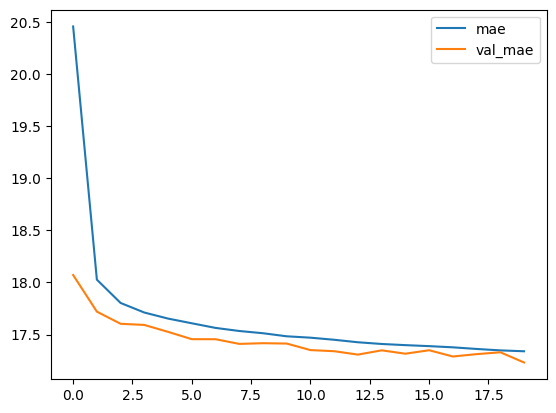

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(64,activation = 'relu',input_shape=(X_train.shape[1],)),

    keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss=['mean_squared_error'],metrics = ['mse', 'mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

import matplotlib.pyplot as plt


plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()
loss = model.evaluate(X_test,y_test)
print(f'RMSE loss: {loss[1]**0.5}')
print(f"MAE loss: {loss[2]}")

как видим результат уже довольно неплох в сранении с прошлыми моделями

In [ ]:
попробуем добавить слоев

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2258/2258 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 575.1493 - mae: 19.5999 - mse: 575.1493 - val_loss: 462.0919 - val_mae: 17.5072 - val_mse: 462.0919
Epoch 2/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 467.3150 - mae: 17.7170 - mse: 467.3150 - val_loss: 449.8939 - val_mae: 17.3028 - val_mse: 449.8939
Epoch 3/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 454.8223 - mae: 17.4033 - mse: 454.8223 - val_loss: 447.0605 - val_mae: 17.2378 - val_mse: 447.0605
Epoch 4/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 446.0517 - mae: 17.2167 - mse: 446.0517 - val_loss: 443.0186 - val_mae: 17.0524 - val_mse: 443.0186
Epoch 5/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 439.2890 - mae: 17.0477 - mse: 439.2890 - val_loss: 440.1238 - val_mae: 16.9082 - val_mse: 440.1238
Epoch 6/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 437.4184 - mae: 16.9490 - mse: 437.4184 - val_loss: 435.0108 - val_mae: 16.8592 - val_mse: 435.0108
Epoch 7/20
2258/2258 ━━━━━━━━━━━━━━━━━━

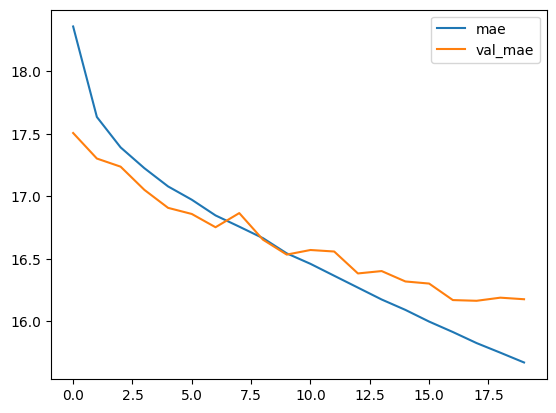

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(64,activation = 'relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss=['mean_squared_error'],metrics = ['mse', 'mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

import matplotlib.pyplot as plt


plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()
loss = model.evaluate(X_test,y_test)
print(f'RMSE loss: {loss[1]**0.5}')
print(f"MAE loss: {loss[2]}")

получили небольшой прирост

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
#spotify["oth"]  = spotify["popularity"]/spotify["duration_ms"]

X = spotify.drop("popularity",axis =1)
X  =poly.fit_transform(X)
Y = spotify["popularity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2258/2258 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 558.4789 - mae: 19.2507 - mse: 558.4789 - val_loss: 457.2379 - val_mae: 17.4907 - val_mse: 457.2379
Epoch 2/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 464.6429 - mae: 17.6586 - mse: 464.6429 - val_loss: 455.4811 - val_mae: 17.3998 - val_mse: 455.4811
Epoch 3/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 455.6597 - mae: 17.4287 - mse: 455.6597 - val_loss: 445.2680 - val_mae: 17.1898 - val_mse: 445.2680
Epoch 4/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 448.5728 - mae: 17.2205 - mse: 448.5728 - val_loss: 441.1316 - val_mae: 16.9573 - val_mse: 441.1316
Epoch 5/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 442.9442 - mae: 17.0139 - mse: 442.9442 - val_loss: 437.4246 - val_mae: 16.9352 - val_mse: 437.4246
Epoch 6/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 433.6000 - mae: 16.8196 - mse: 433.6000 - val_loss: 430.9789 - val_mae: 16.7486 - val_mse: 430.9789
Epoch 7/20
2258/2258 ━━━━━━━━━━━━━━━━━━

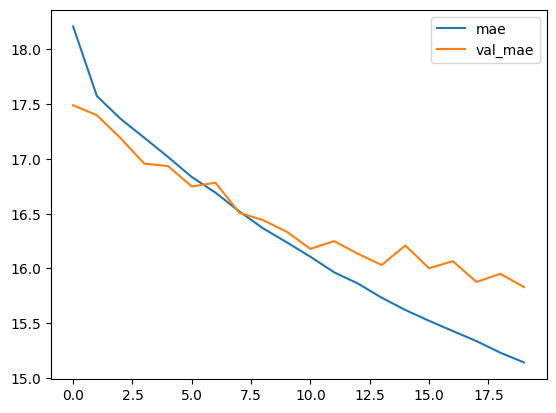

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(128,activation = 'relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(16,activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss=['mean_squared_error'],metrics = ['mse', 'mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)
#model.fit(X_train,y_train,epochs = 100,batch_size = 32,validation_split = 0.2)
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()
loss = model.evaluate(X_test,y_test)
print(f'RMSE loss: {loss[1]**0.5}')
print(f"MAE loss: {loss[2]}")

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2258/2258 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 552.9034 - mae: 19.1391 - mse: 552.9034 - val_loss: 460.6636 - val_mae: 17.5622 - val_mse: 460.6636
Epoch 2/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 462.4384 - mae: 17.5780 - mse: 462.4384 - val_loss: 451.0362 - val_mae: 17.2744 - val_mse: 451.0362
Epoch 3/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 453.2971 - mae: 17.3231 - mse: 453.2971 - val_loss: 445.8076 - val_mae: 17.1385 - val_mse: 445.8076
Epoch 4/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 445.2944 - mae: 17.1383 - mse: 445.2944 - val_loss: 440.0170 - val_mae: 16.9038 - val_mse: 440.0170
Epoch 5/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 439.3210 - mae: 16.9638 - mse: 439.3210 - val_loss: 436.4496 - val_mae: 16.8645 - val_mse: 436.4496
Epoch 6/20
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 434.5897 - mae: 16.8653 - mse: 434.5897 - val_loss: 436.5220 - val_mae: 16.8562 - val_mse: 436.5220
Epoch 7/20
2258/2258 ━━━━━━━━━━━━━━━━━━

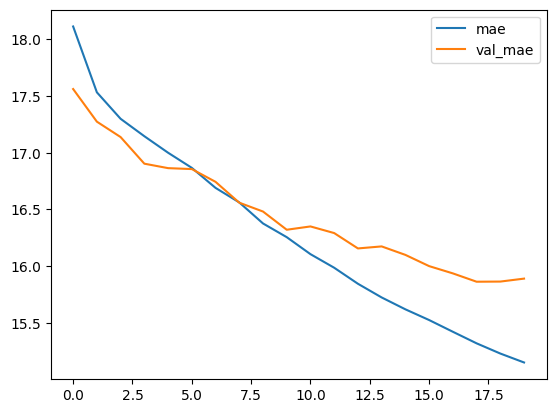

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(128,activation = 'relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(16,activation = 'relu'),
    keras.layers.Dense(8,activation = 'relu'),
    keras.layers.Dense(4,activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss=['mean_squared_error'],metrics = ['mse', 'mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)
#model.fit(X_train,y_train,epochs = 100,batch_size = 32,validation_split = 0.2)
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()
loss = model.evaluate(X_test,y_test)
print(f'RMSE loss: {loss[1]**0.5}')
print(f"MAE loss: {loss[2]}")

Дальнейшее увеличение слоев привело к переобучению

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2258/2258 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 541.4960 - mae: 18.9352 - mse: 541.4960 - val_loss: 479.4970 - val_mae: 18.0595 - val_mse: 479.4970
Epoch 2/15
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 465.5676 - mae: 17.6526 - mse: 465.5676 - val_loss: 451.3893 - val_mae: 17.2996 - val_mse: 451.3893
Epoch 3/15
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 455.2835 - mae: 17.3730 - mse: 455.2835 - val_loss: 446.9849 - val_mae: 17.1766 - val_mse: 446.9849
Epoch 4/15
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 450.3604 - mae: 17.2266 - mse: 450.3604 - val_loss: 438.9069 - val_mae: 16.9575 - val_mse: 438.9069
Epoch 5/15
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 443.1955 - mae: 17.0498 - mse: 443.1955 - val_loss: 439.7912 - val_mae: 16.9697 - val_mse: 439.7912
Epoch 6/15
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 440.7820 - mae: 16.9752 - mse: 440.7820 - val_loss: 437.8835 - val_mae: 16.9326 - val_mse: 437.8835
Epoch 7/15
2258/2258 ━━━━━━━━━━━━━━━━━━

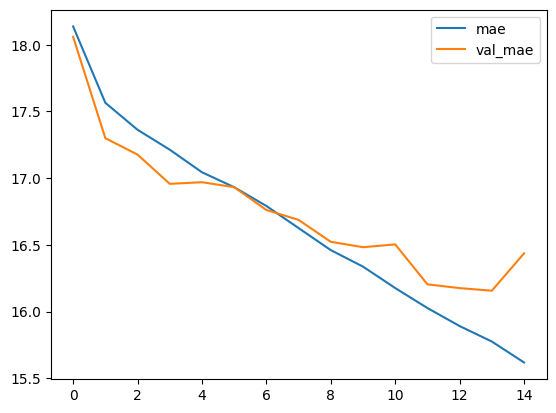

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(256,activation = 'relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(16,activation = 'relu'),
    keras.layers.Dense(8,activation = 'relu'),
    keras.layers.Dense(4,activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss=['mean_squared_error'],metrics = ['mse', 'mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15)
#model.fit(X_train,y_train,epochs = 100,batch_size = 32,validation_split = 0.2)
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()
loss = model.evaluate(X_test,y_test)
print(f'RMSE loss: {loss[1]**0.5}')
print(f"MAE loss: {loss[2]}")

# КРОСС-ВАЛИДАЦИЯ

оценим модель на кросс валидации

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


X = spotify.drop("popularity",axis =1)
Y = spotify["popularity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

scaler = StandardScaler()
X__train_scaler = scaler.fit_transform(X_train)
model = RandomForestRegressor()
mse = cross_val_score(model, X__train_scaler, y_train, cv=10,
                        scoring='neg_mean_squared_error'
                        )
print("MSE: ",-1*mse.mean())
mae = cross_val_score(model, X__train_scaler, y_train, cv=10,
                        scoring='neg_mean_absolute_error',
                        )
print("MAE: ",mae.mean())

MSE:  204.64192040229221
MAE:  -10.610345770784571


забыл умножить MAE на -1,не стал переделывать т.к очень долго выполняется

# Вывод

**Вывод:** лучше всего себя показал RandomForestRegressor с результатом MAE: 12.49272265575555,RMSE: 16.227678681108035,MSE: 263.3375553772882,но при этом эта модель и дольше всех и обучалась.Что касается самих данных,мы видим преобладание объектов с низкой популярностью(0-20),и по всей видимости это ухудшило результат модели.Также отсутствуют признаки которые сильно коррелируют с таргетной переменной,что тоже не улучшило метрики